# Step 1: import modules and files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
import geopandas as gpd
import descartes
from shapely.geometry import Point , Polygon
from collections import Counter
import ast
%matplotlib inline

In [2]:
import pixiedust

Pixiedust database opened successfully


In [3]:
file_path = '/Users/colinechabloz/Desktop/Datasets/'
common3_n = 'common3.csv'
brand_day_df_n = 'brand_day_df.csv'
brand_month_df_n = 'brand_month_df.csv'
brand_top_df_n = 'brand_top_df.csv'

In [4]:
common3 = pd.read_csv((file_path+common3_n), dtype={'census_block_group':str},
                      converters={"related_same_day_brand": ast.literal_eval,
                                  "related_same_month_brand": ast.literal_eval,
                                  "top_brands" : ast.literal_eval })

In [5]:
brand_day_df= pd.read_csv((file_path+brand_day_df_n), dtype={'census_block_group':str})

In [6]:
brand_month_df= pd.read_csv((file_path+brand_month_df_n), dtype={'census_block_group':str})

In [7]:
brand_top_df= pd.read_csv((file_path+brand_top_df_n), dtype={'census_block_group':str})

# Step 2: create functions to find top brands in a given df

In [8]:
hour_list = ['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [9]:
common3.head()

,Unnamed: 0,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,...,visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors
0,0,010059508001,75122.0,18314.0,194724.0,"[chick-fil-a, mcdonalds, marathonpetroleum, wa...","[walmart, mcdonalds, dollargeneral, chick-fil-...","[crossfit, healthmart, coldwellbanker]",31.920410,-85.175741,...,"{'010059501003': 127, '010059509001': 111, '01...",14,1.005950e+10,1.067030e+10,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,1.005950e+10,1.069040e+10,70.000000
1,1,010090506011,95649.0,38942.0,120587.0,"[shelloil, mcdonalds, chick-fil-a, chevron]","[walmart, mcdonalds, shelloil, chick-fil-a, do...",[],33.863884,-86.903514,...,"{'010730113021': 210, '010090506022': 205, '01...",69,1.073011e+10,1.009051e+10,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,1.089011e+10,1.077011e+10,93.756098
2,2,010479572002,14009.0,3039.0,67774.0,[dollargeneral],"[walmart, dollargeneral, mcdonalds, chevron, s...",[dollargeneral],32.357337,-87.014004,...,"{'010479567011': 67, '010479567021': 60}",2,1.047957e+10,1.047957e+10,63.500000,{'010479567021': 52},1,1.047957e+10,1.047957e+10,52.000000
3,3,010690404001,128169.0,25418.0,42684.0,"[chick-fil-a, samsclub, dollargeneral, walmart]","[walmart, dollargeneral, mcdonalds, marathonpe...","[chick-fil-a, samsclub, olivegarden, mcdonalds...",31.237327,-85.426331,...,"{'010690402013': 370, '010690402011': 322, '01...",92,1.069040e+10,1.069040e+10,99.000000,"{'010690402024': 313, '010690415004': 203, '01...",23,1.069040e+10,1.031011e+10,108.173913
4,4,010730112101,51453.0,9499.0,18878.0,"[chevron, daylightdonuts, walmart]","[walmart, chevron, dollargeneral, shelloil, ja...","[chevron, crossfit]",33.671800,-86.690610,...,"{'010090507001': 183, '010730113021': 167, '01...",37,1.009051e+10,1.073012e+10,81.513514,"{'010730045001': 140, '010730027001': 123, '01...",10,1.073005e+10,1.073002e+10,86.500000


In [10]:
common3.shape

(220240, 82)

<b>Functions to find top brands in a given dataframe</b>

In [11]:
def count_brands_frequency(brands_list,brands_dict):
    for brand in brands_list:
        if brand in brands_dict:
            brands_dict[brand] += 1
        else:
            brands_dict.update({brand : 1})
    

def find_top_x_brands(dataframe,number):
    brands_dict = dict()
    dataframe.apply(lambda brands_list : count_brands_frequency(brands_list, brands_dict))
    counter = Counter(brands_dict)
    top_x = counter.most_common(number)
    top_x = [elem[0] for elem in top_x]
    
    return top_x
    

def find_top_x_brands_with_vals(dataframe,number):
    brands_dict = dict()
    dataframe.apply(lambda brands_list : count_brands_frequency(brands_list, brands_dict))
    counter = Counter(brands_dict)
    top_x = counter.most_common(number)
    
    return top_x


# Step 3: plot cbgs on map

<b>Plot cbgs with given latitude and longitude</b>

In [12]:
import geopandas as gpd
import descartes
from shapely.geometry import Point , Polygon
%matplotlib inline

<p>Get latitude and longitude from main dataframe</p>

In [13]:
coordinates_df = common3[['latitude','longitude']].copy()

In [14]:
coordinates_df.head()

,latitude,longitude
0,31.920410,-85.175741
1,33.863884,-86.903514
2,32.357337,-87.014004
3,31.237327,-85.426331
4,33.671800,-86.690610


In [15]:
us_map = gpd.read_file("/Users/colinechabloz/Desktop/Maps/USA States/USA_States.shp")

In [16]:
us_map1 = us_map.drop([49,50], axis = 0)# check if you need alaska and hawaii and if you don't you can use this geoDataFrame

In [17]:
%%capture
figure, ax = plt.subplots(figsize = (30,30))
us_map.plot(ax = ax)

In [18]:
crs = {'init': 'epsg:4326'}

In [19]:
geometry = [Point(xy) for xy in zip(coordinates_df['longitude'],coordinates_df['latitude'])]

In [20]:
geometry[:3]

In [21]:
us_map.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,(POLYGON ((-122.4020155858616 48.2252165511906...
1,Montana,30,MT,POLYGON ((-111.4754251130775 44.70216222595448...
2,Maine,23,ME,(POLYGON ((-69.77727626459058 44.0741483198713...
3,North Dakota,38,ND,POLYGON ((-98.73043690141785 45.93827103856795...
4,South Dakota,46,SD,POLYGON ((-102.7883845696141 42.99530357568786...


In [22]:
cbg_w_coordinates = pd.concat([common3['census_block_group'],coordinates_df],axis = 1, ignore_index= False, sort=False)

In [23]:
geo_data = gpd.GeoDataFrame(cbg_w_coordinates, crs= crs,geometry = geometry)

In [24]:
geo_data.head()

,census_block_group,latitude,longitude,geometry
0,010059508001,31.920410,-85.175741,POINT (-85.17574090000002 31.92041)
1,010090506011,33.863884,-86.903514,POINT (-86.9035142 33.8638835)
2,010479572002,32.357337,-87.014004,POINT (-87.0140035 32.3573365)
3,010690404001,31.237327,-85.426331,POINT (-85.4263314 31.2373273)
4,010730112101,33.671800,-86.690610,POINT (-86.69061020000002 33.6717999)


<b>Plot most_popular cbgs (with the percentage given)</b>

In [25]:
common3.shape

(220240, 82)

In [26]:
column_name = 'raw_visit_count'

In [27]:
#uncomment line num_of_cbgs for usign it as a percentage and not as a raw number
def get_most_popular_cbgs(number,column_name):
    """ The percentage MUST be a number between 0 and 1 (obviously larger than 0)"""
    if number <= 0:
        print("Please enter a valid percentage")
        return
    #first get the number that the percentage represents
    num_of_cbgs = number #int(common3.shape[0]*number) 
    #get the cbg list from main dataset
    cbg_list = common3[['census_block_group', column_name]]
    
    return find_k_highest_visited_cbgs(num_of_cbgs,cbg_list,column_name)['census_block_group']

def find_k_highest_visited_cbgs(num_of_cbgs,cbgs_list,column_name):
    """Returns a dataframe containing the k-largest cbgs"""
    return cbgs_list.sort_values(by = column_name, ascending = False).iloc[0:(num_of_cbgs -1)]

In [28]:
#So now I have to get the most popular cbgs and then get the subset from the geo_data variable to plot it
def plot_most_popular_cbgs_in_map(number,column_name,geo_data,dot_size):  
    """This method provides an easy way to plot the cbgs, the first arg is the number of cbgs, the the column (visitors per day, per week, etc), dot_size is the radio of the plotted dots"""
    cbgs_list = geo_data[geo_data['census_block_group'].isin(get_most_popular_cbgs(number,column_name))]
    figure, ax = plt.subplots(figsize  = (50,30))
    us_map.plot(ax = ax, alpha = 0.5, color = "grey")
    cbgs_list.plot(ax = ax, markersize = dot_size, color = "red", marker = "o", label = "census block group")
    plt.savefig("Top_" + str(number) + "cbgs.pdf")
    plt.legend(prop = {'size' : 15})

    
    

<b>3.1 Plot top 5 cbgs in map (raw visitor count)</b>

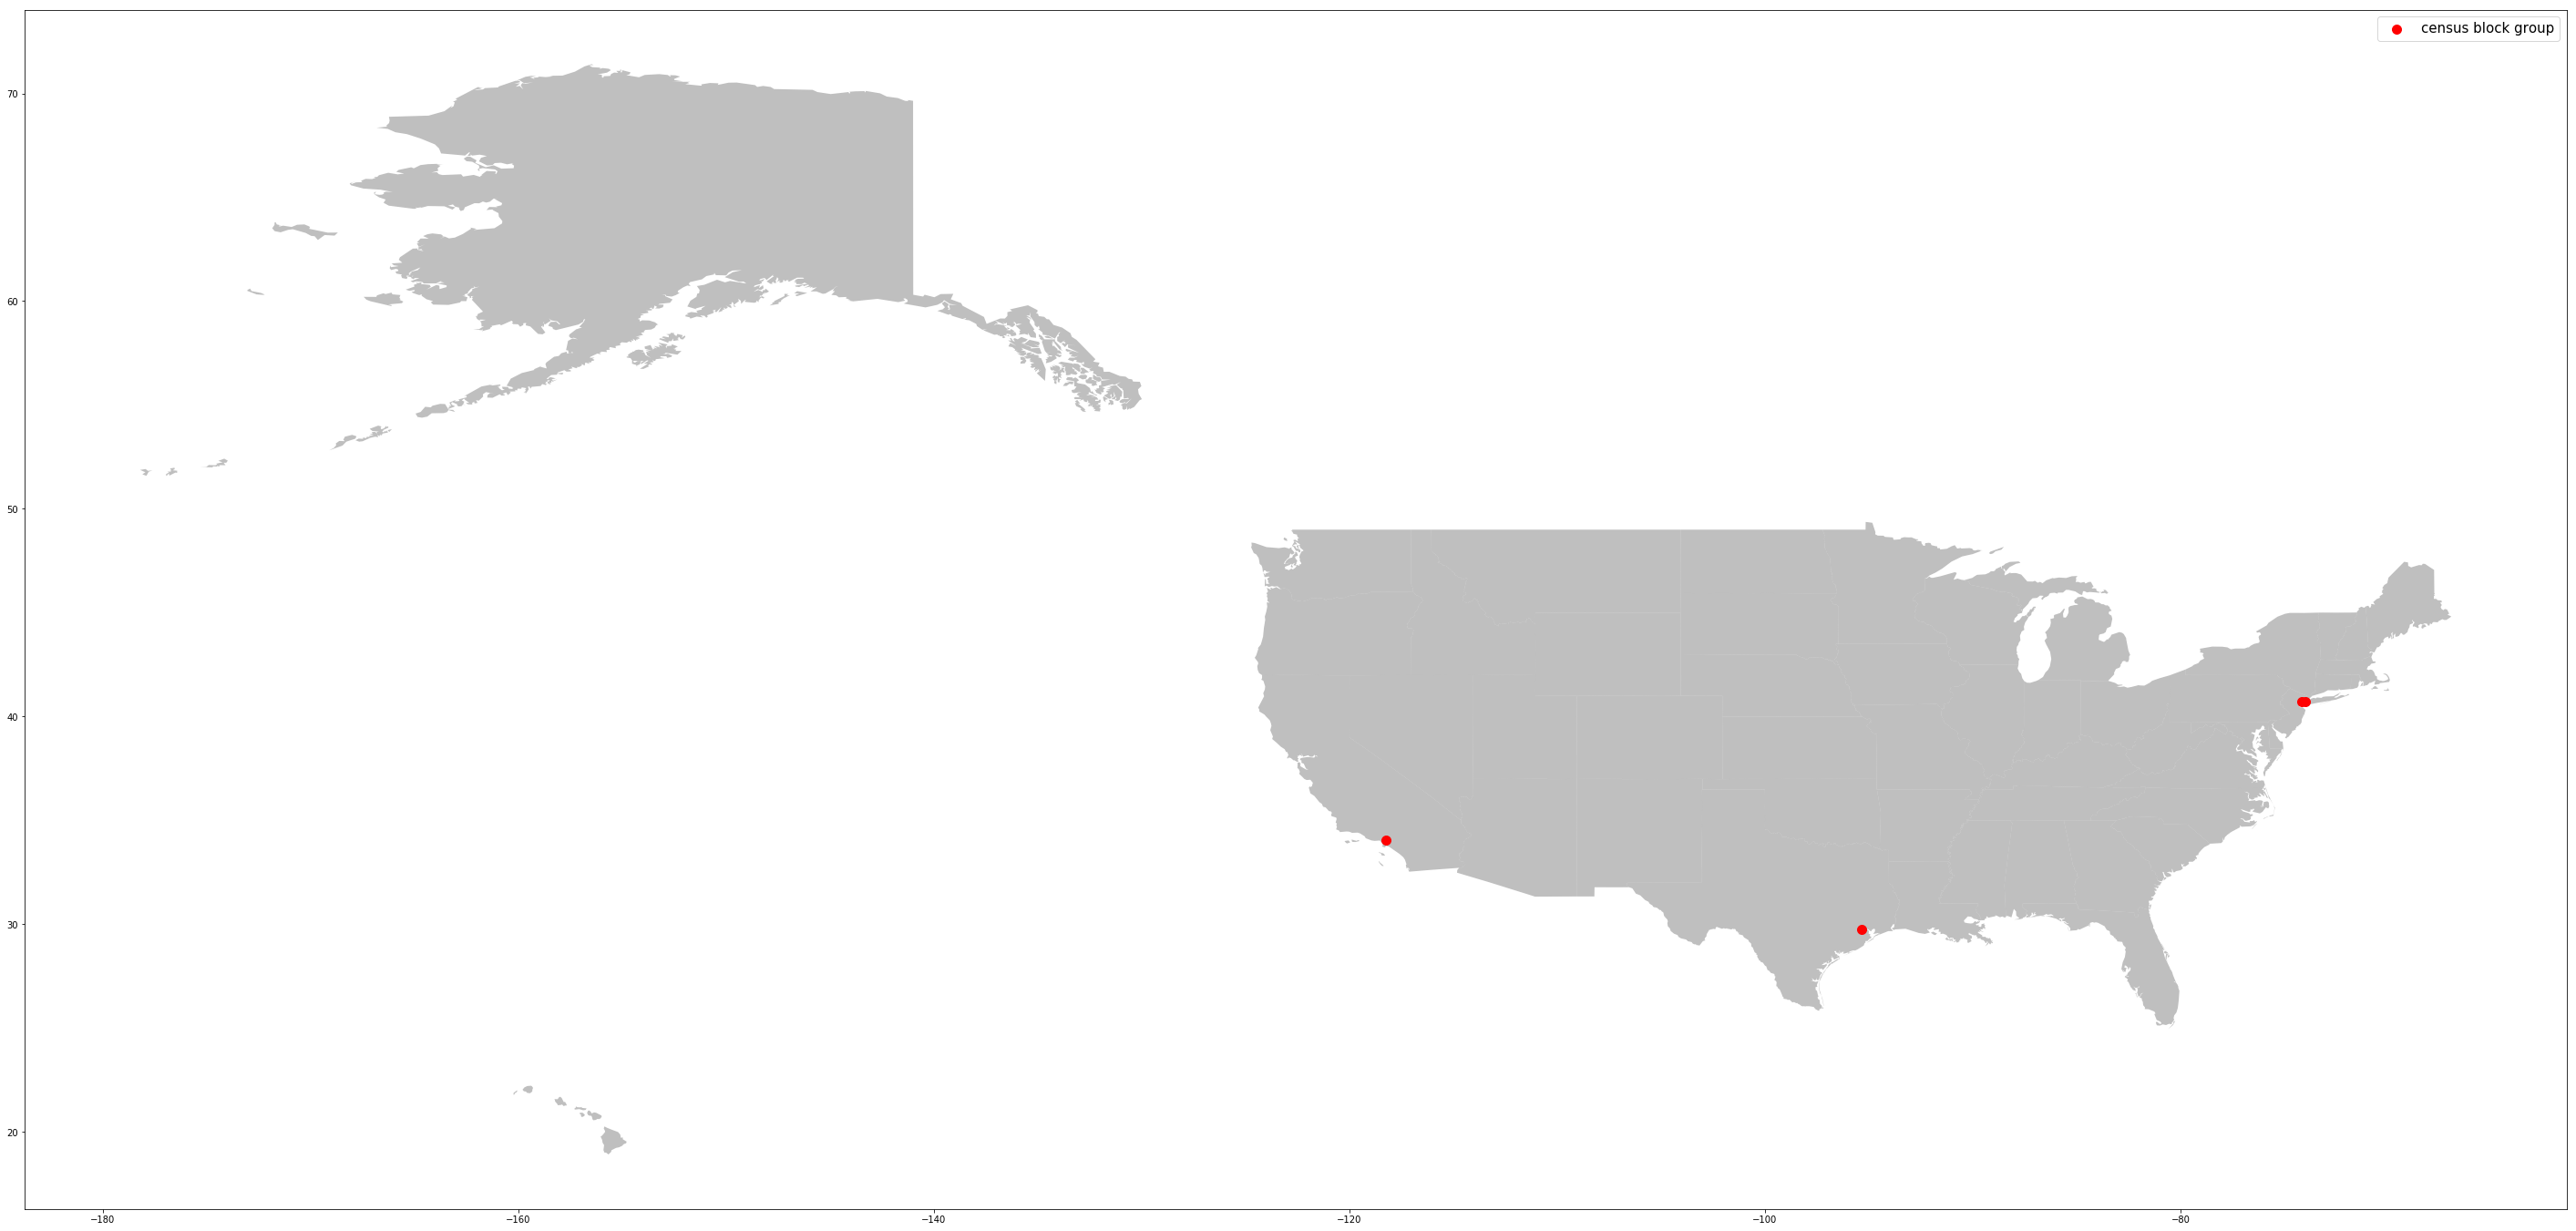

In [29]:
plot_most_popular_cbgs_in_map(5,column_name,geo_data,100)

<b>Plot top 10 cbgs in map (raw visitor count)</b>

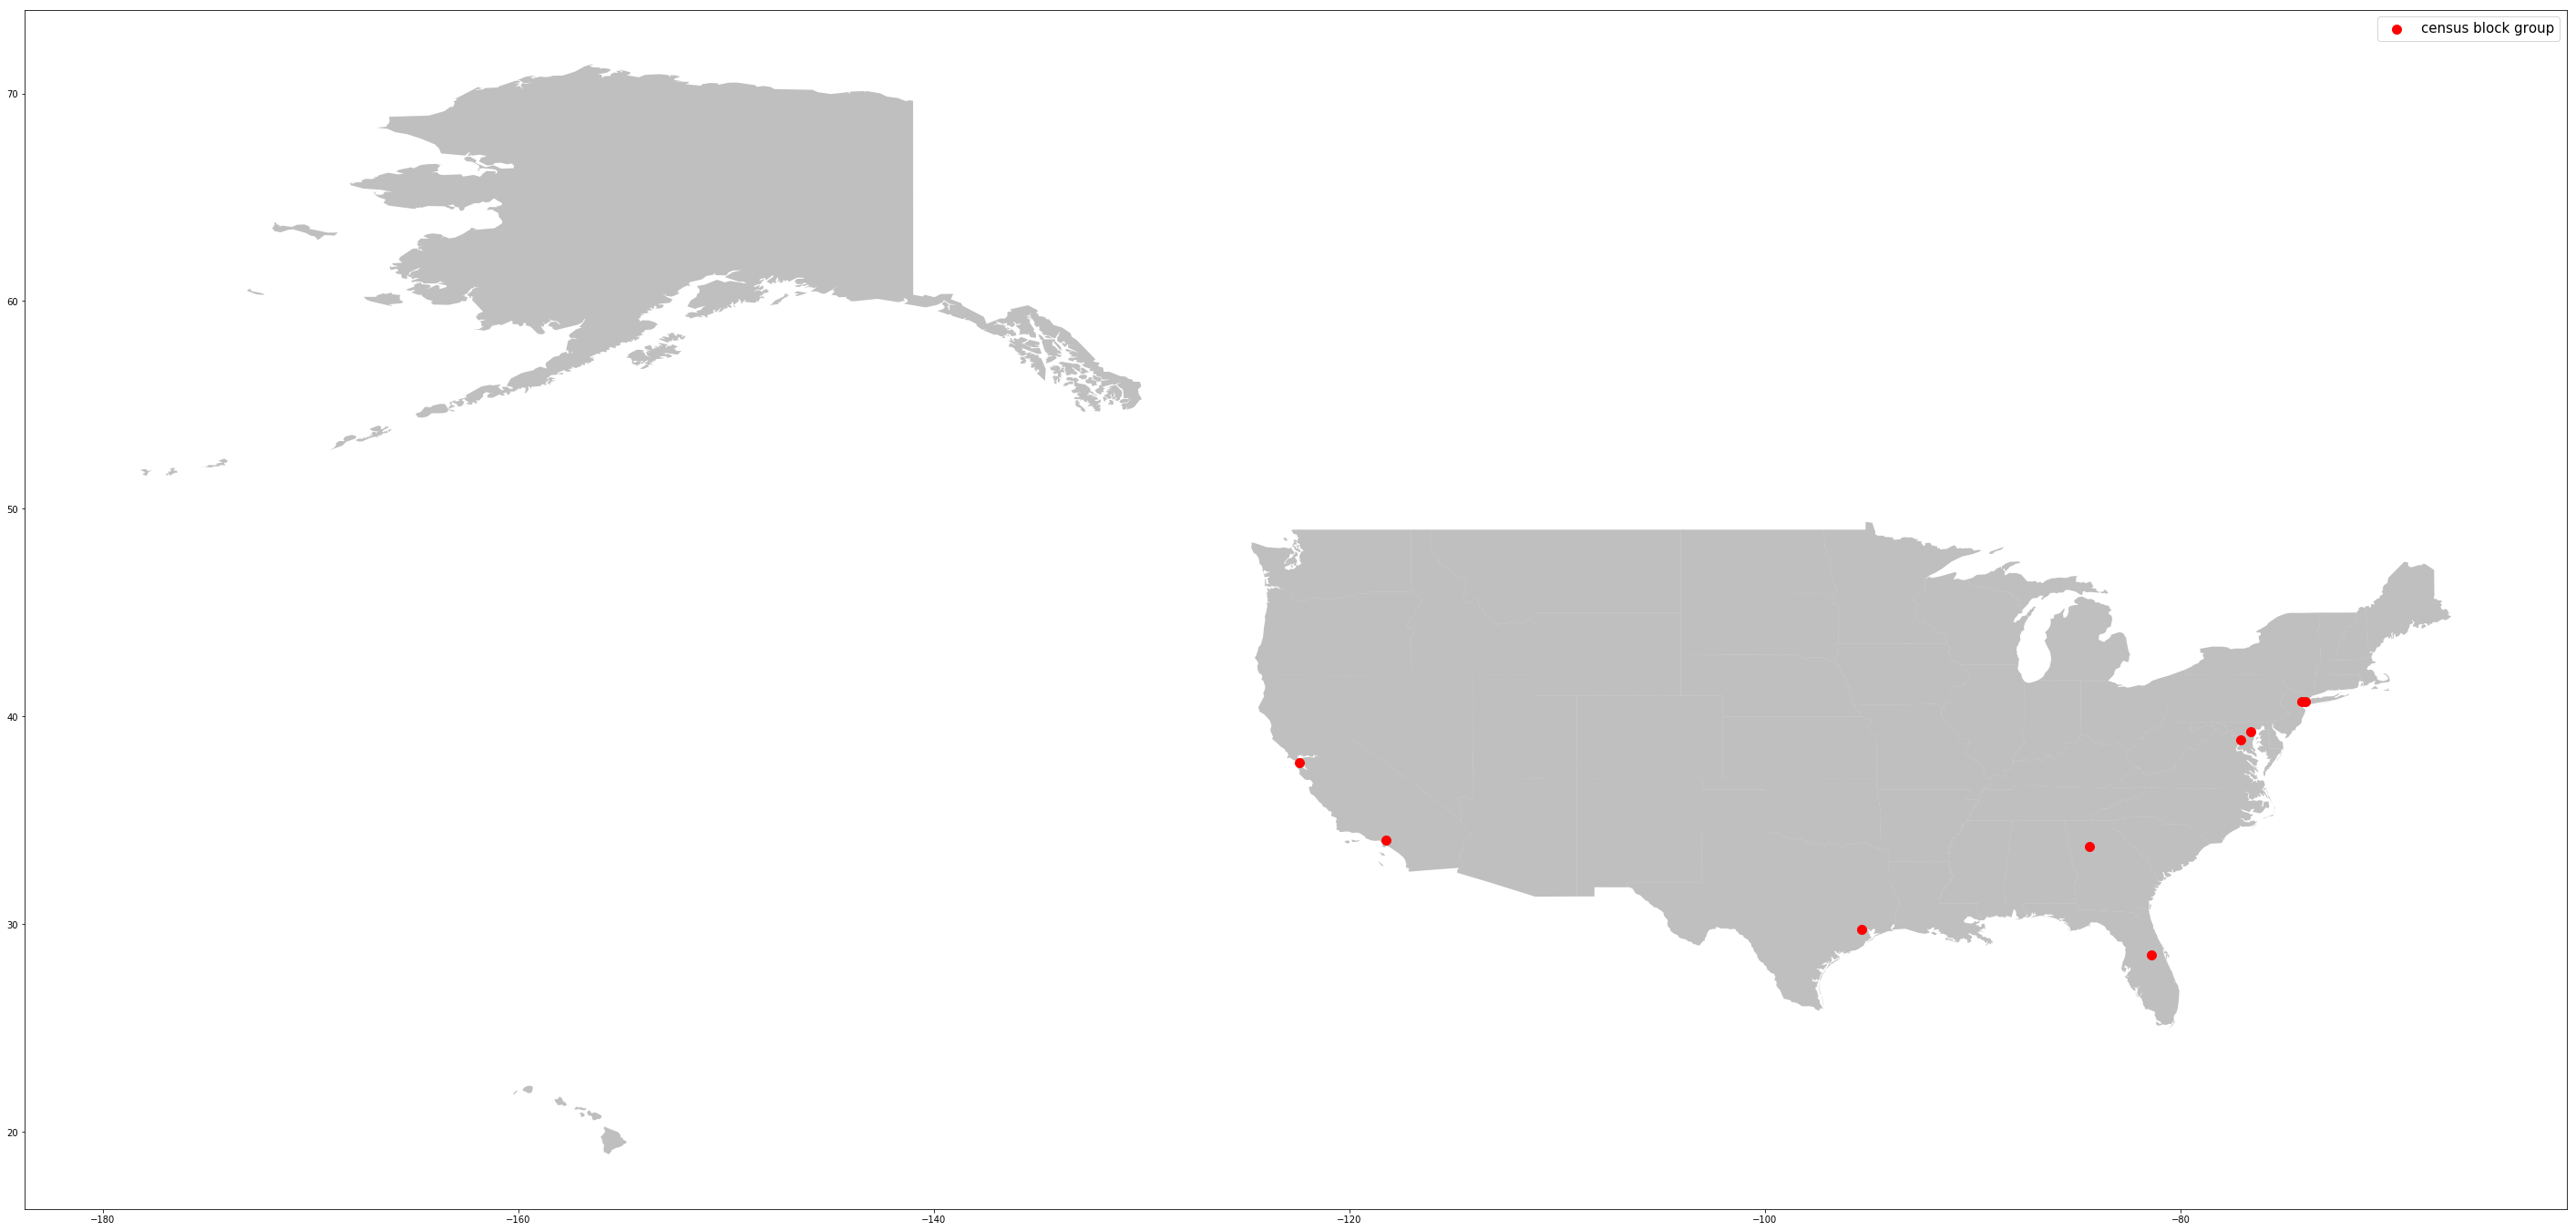

In [30]:
plot_most_popular_cbgs_in_map(10,column_name,geo_data,100)

<b>3.2 Plot top 10 cbgs in map (raw visit count)</b>

In [31]:
column_name = "raw_visit_count"

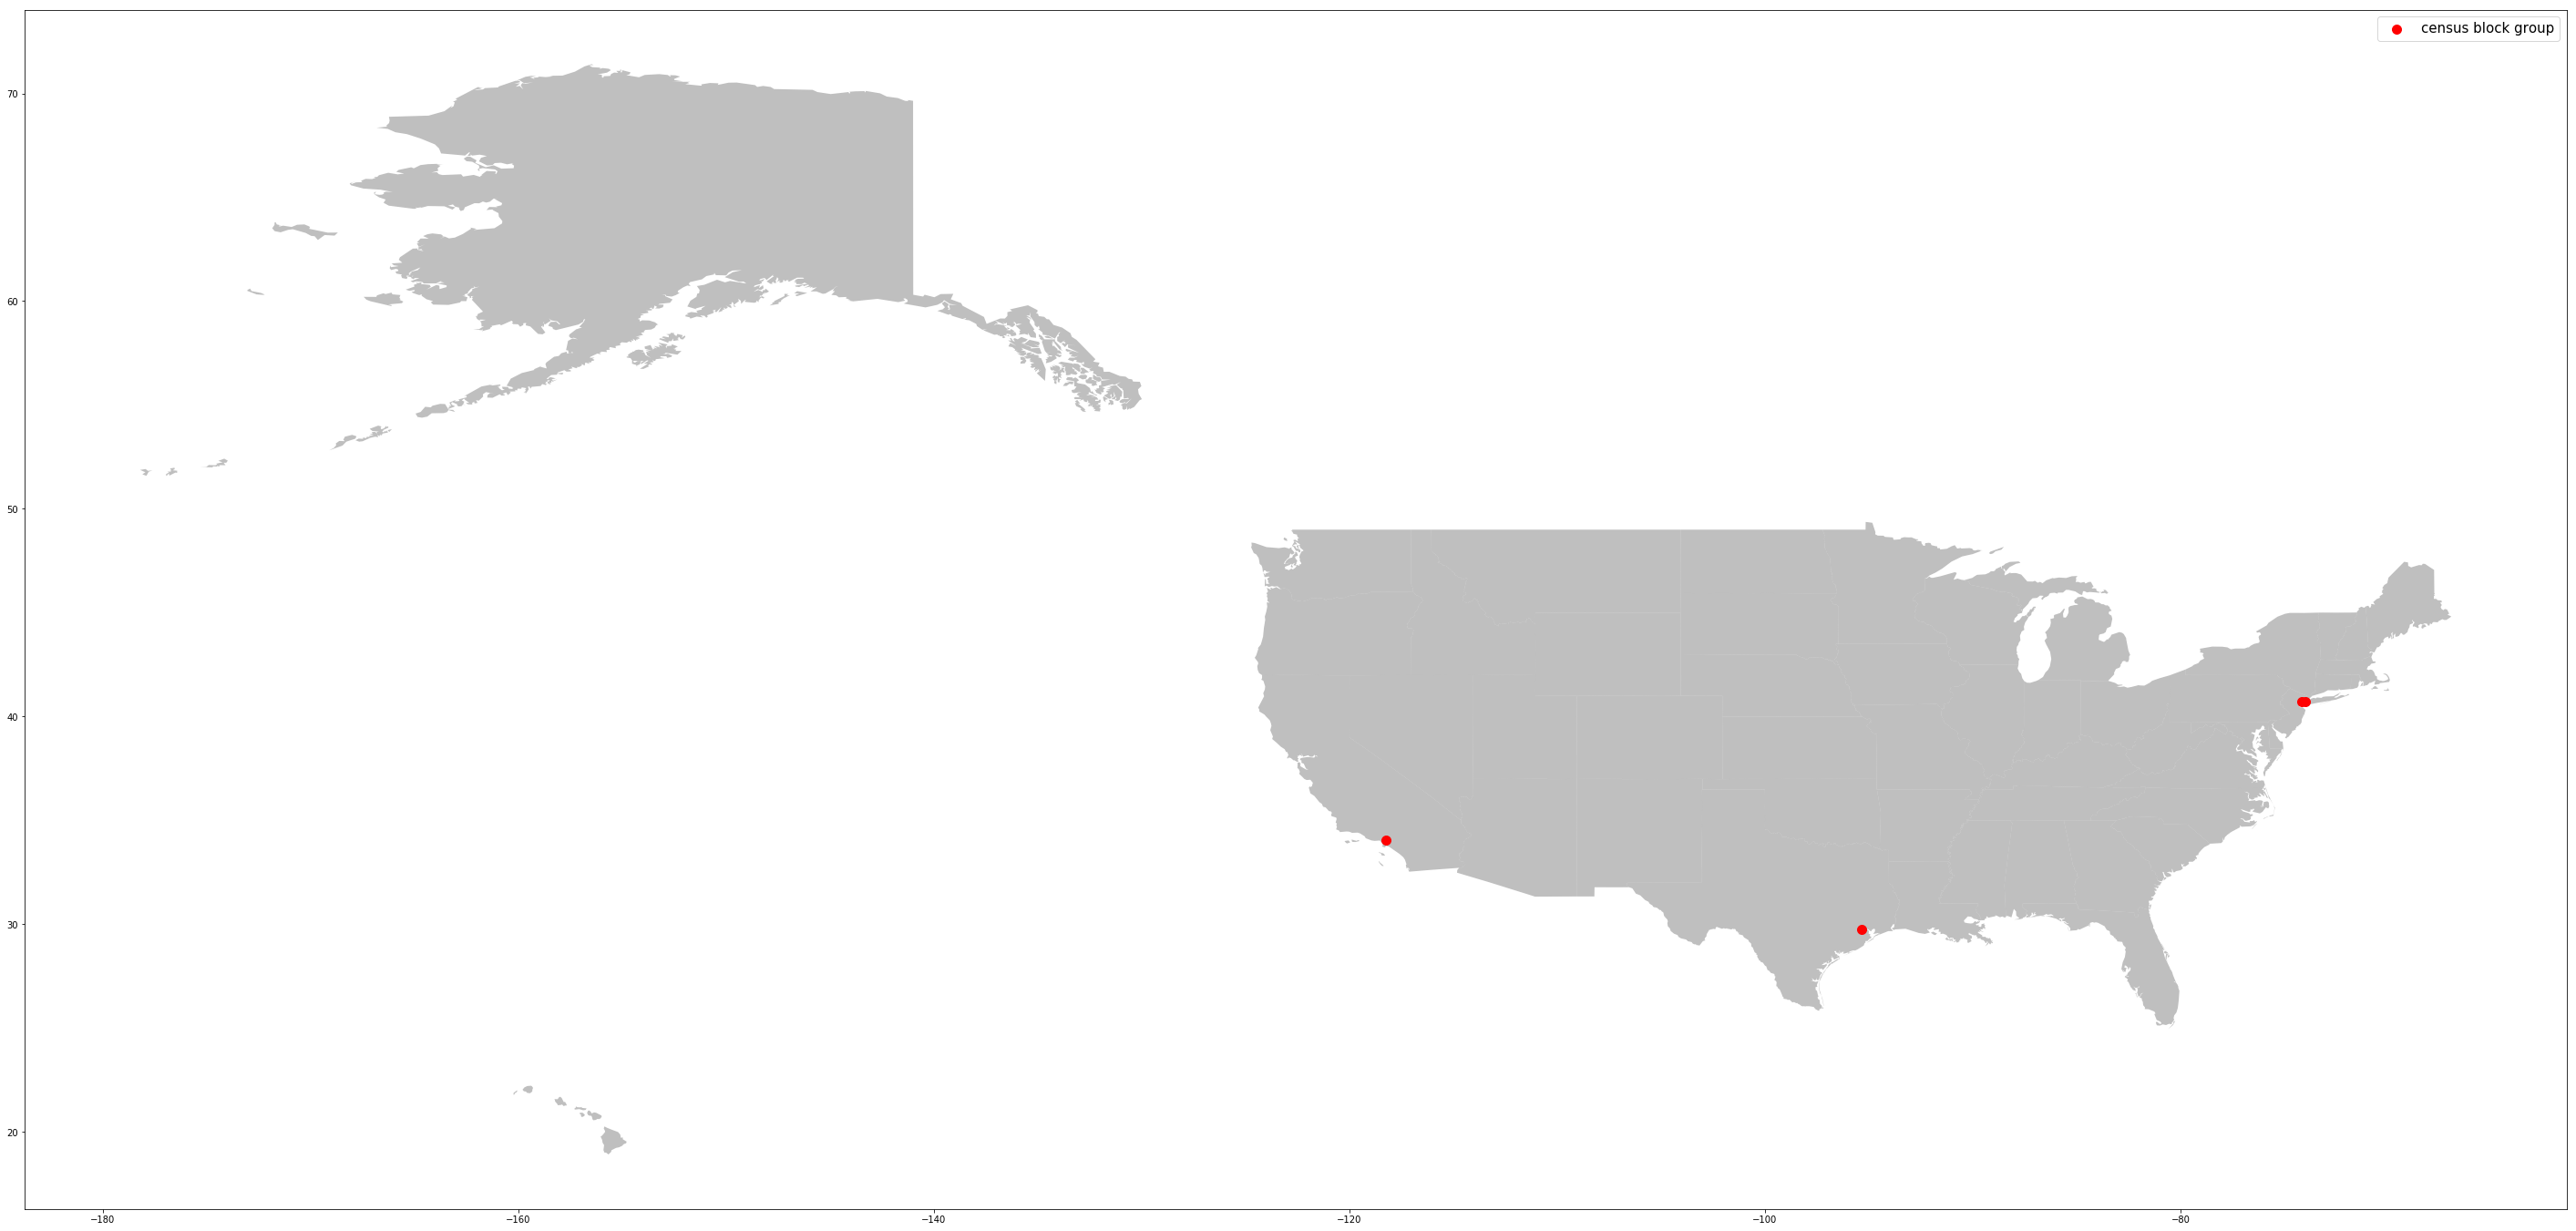

In [32]:
plot_most_popular_cbgs_in_map(5,column_name,geo_data,100)

<b>Plot top 10 cbgs in map (raw visit count)</b>

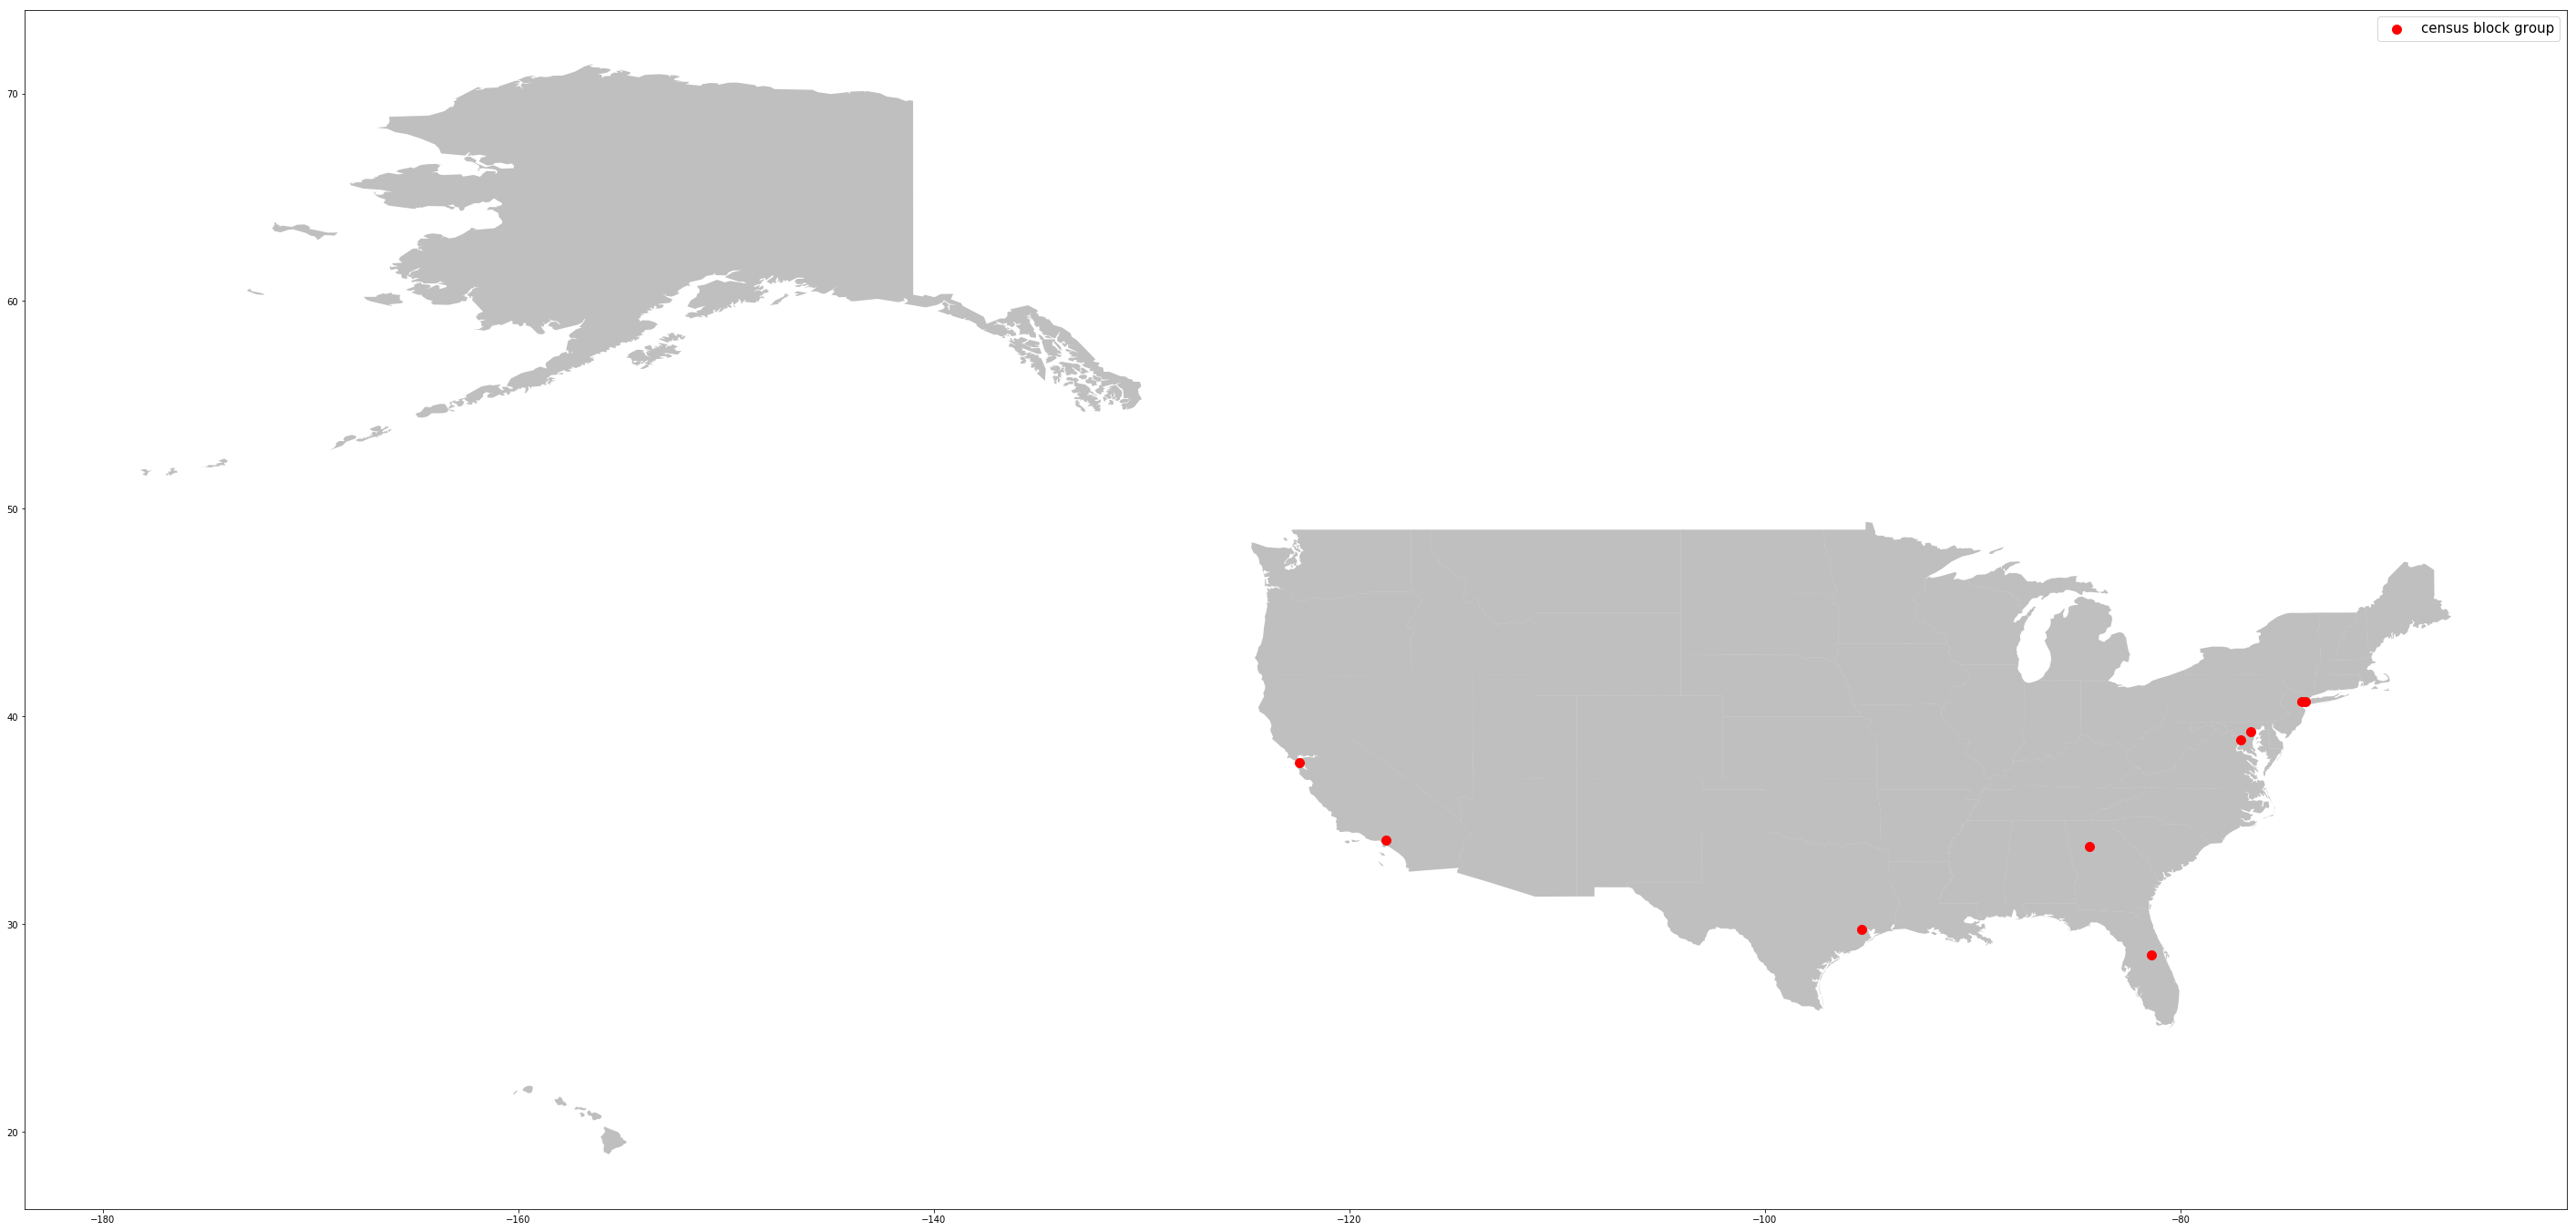

In [33]:
plot_most_popular_cbgs_in_map(10,column_name,geo_data,100)

# Step 4: create high level histograms of the popularity by day and hour

<b>4.1 Plot popularity of days of the week</b>

<p>First, get the sum of all days of the week in common3</p>

In [34]:
week_sum = common3[week_list].sum(axis = 0, skipna = True).tolist()

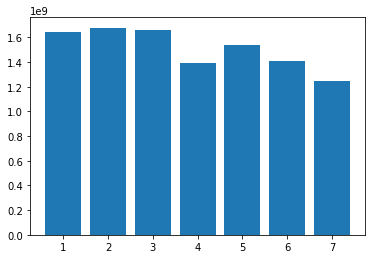

In [35]:
plot = plt.bar(range(1,8), height = week_sum) 
plt.show()# 1 is Monday, 2 Tuesday and so on
# count on columns "Monday", "Tuesday", ...

<b>4.2 Plot popularity of hours in a day</b>

In [36]:
hour_sum = common3[hour_list].sum(axis = 0 ,skipna = True).tolist()

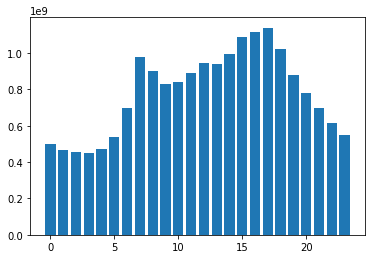

In [37]:
 plot = plt.bar(range(0,24), height = hour_sum) 
plt.show()# 1 is Monday, 2 Tuesday and so on

# Step 5: plot top x cbgs (with the number x given)

In [38]:
# count on "raw_visit_count" column
def plot_most_popular_cbgs_in_hist(number,column_name):
    
    cbg_list = common3[['census_block_group',column_name]]
    cbg_list = cbg_list.sort_values(by = column_name, ascending = False)
    height =  cbg_list[column_name].iloc[0:number].tolist()
    
    plt.bar(range(1,number + 1), height = height) 

<b>Top 10</b>

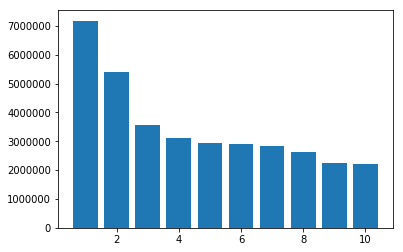

In [39]:
column_name ="raw_visit_count"
plot_most_popular_cbgs_in_hist(10,column_name)

<b>Top 20</b>

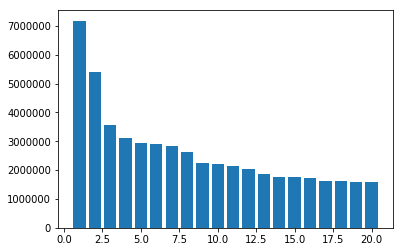

In [40]:
plot_most_popular_cbgs_in_hist(20,column_name)

<b>Top 100</b>

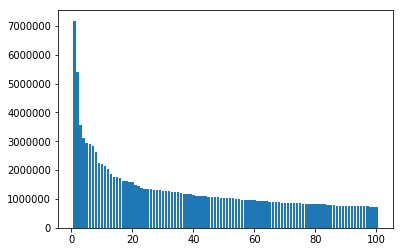

In [41]:
plot_most_popular_cbgs_in_hist(100,column_name)

<b>Top 500</b>

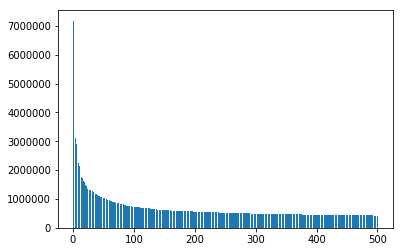

In [42]:
plot_most_popular_cbgs_in_hist(500,column_name)

<b>Top 1000</b>

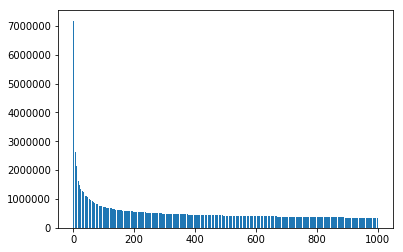

In [43]:
plot_most_popular_cbgs_in_hist(1000,column_name)

# Step 6: day classification

<b>6.1 Divide days in categories (week days and weekends)</b>
<p>First find cbgs where the most popular day is Monday</p>

In [44]:
week_list_with_cbg = ['census_block_group'] + week_list

In [45]:
weekday_list = list()
weekend_list = list()

In [46]:
week_days = week_list[0:4]
weekend_days = week_list[4:7]

In [47]:
week_days

['Monday', 'Tuesday', 'Wednesday', 'Thursday']

In [48]:
common3[week_list].head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [49]:
def max_in_weekday(row):
    return row.idxmax(axis = 1) in week_days 


In [50]:
for index,value in common3[week_list_with_cbg].iterrows():
    if max_in_weekday(value[1:8].astype(int)):
        weekday_list.append(value[0])
        
    

In [51]:
len(weekday_list)

188254

Nb of cbgs where the highest amount of visitors is between Monday and Thursday. 

In [52]:
weekend_list = list(set(common3['census_block_group']).difference(set(weekday_list)))

In [53]:
len(weekend_list)

31986

Nb of cbgs where the highest amount of visitors is between Friday and Sunday. Total = 220 240 OK

<b> Create dataframe with all column information for the two groups: weekday and weekend</b>

In [54]:
weekday_df = common3[common3['census_block_group'].isin(set(weekday_list))]

In [55]:
weekend_df = common3[common3['census_block_group'].isin(set(weekend_list))]

In [56]:
weekday_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188254 entries, 0 to 220239
Data columns (total 82 columns):
Unnamed: 0                    188254 non-null int64
census_block_group            188254 non-null object
raw_visit_count               188254 non-null float64
raw_visitor_count             188254 non-null float64
distance_from_home            188217 non-null float64
related_same_day_brand        188254 non-null object
related_same_month_brand      188254 non-null object
top_brands                    188254 non-null object
latitude                      188254 non-null float64
longitude                     188254 non-null float64
12am                          188254 non-null float64
1am                           188254 non-null float64
2am                           188254 non-null float64
3am                           188254 non-null float64
4am                           188254 non-null float64
5am                           188254 non-null float64
6am                           1

In [57]:
weekday_df.head()

,Unnamed: 0,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,...,visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors
0,0,010059508001,75122.0,18314.0,194724.0,"[chick-fil-a, mcdonalds, marathonpetroleum, wa...","[walmart, mcdonalds, dollargeneral, chick-fil-...","[crossfit, healthmart, coldwellbanker]",31.920410,-85.175741,...,"{'010059501003': 127, '010059509001': 111, '01...",14,1.005950e+10,1.067030e+10,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,1.005950e+10,1.069040e+10,70.000000
2,2,010479572002,14009.0,3039.0,67774.0,[dollargeneral],"[walmart, dollargeneral, mcdonalds, chevron, s...",[dollargeneral],32.357337,-87.014004,...,"{'010479567011': 67, '010479567021': 60}",2,1.047957e+10,1.047957e+10,63.500000,{'010479567021': 52},1,1.047957e+10,1.047957e+10,52.000000
3,3,010690404001,128169.0,25418.0,42684.0,"[chick-fil-a, samsclub, dollargeneral, walmart]","[walmart, dollargeneral, mcdonalds, marathonpe...","[chick-fil-a, samsclub, olivegarden, mcdonalds...",31.237327,-85.426331,...,"{'010690402013': 370, '010690402011': 322, '01...",92,1.069040e+10,1.069040e+10,99.000000,"{'010690402024': 313, '010690415004': 203, '01...",23,1.069040e+10,1.031011e+10,108.173913
4,4,010730112101,51453.0,9499.0,18878.0,"[chevron, daylightdonuts, walmart]","[walmart, chevron, dollargeneral, shelloil, ja...","[chevron, crossfit]",33.671800,-86.690610,...,"{'010090507001': 183, '010730113021': 167, '01...",37,1.009051e+10,1.073012e+10,81.513514,"{'010730045001': 140, '010730027001': 123, '01...",10,1.073005e+10,1.073002e+10,86.500000
5,5,010970063022,152557.0,23556.0,40327.0,[walmart],"[walmart, shelloil, dollargeneral, mcdonalds, ...","[walmart, winndixie, olliesbargainoutlet, soni...",30.769886,-88.245374,...,"{'010970063011': 370, '010970063021': 351, '01...",53,1.097006e+10,2.808903e+11,121.679245,"{'010970063011': 328, '010970064023': 125, '01...",15,1.097006e+10,2.803500e+11,101.333333


<b>6.2 Top 10 brands in weekday</b>

<p>Now we can compare differences of top brands between categories</p>

In [58]:
brands_10_weekday_day = find_top_x_brands_with_vals(weekday_df['related_same_day_brand'],10)
brands_10_weekday_month = find_top_x_brands_with_vals(weekday_df['related_same_month_brand'],10)
brands_10_weekday_all = find_top_x_brands_with_vals(weekday_df['top_brands'],10)

In [59]:
brands_10_weekday_day

[('walmart', 35970),
 ('mcdonalds', 34729),
 ('dunkindonuts', 18912),
 ('dollargeneral', 13761),
 ('starbucks', 12276),
 ('quiktrip', 8877),
 ('7-elevenus', 8592),
 ('wawa', 8083),
 ('sonic', 7776),
 ('shelloil', 7514)]

Interpretation: Walmart appears in 35 970 rows/cbg in the column "related_same_day_brand" in the dataframe "weekday_df"

In [76]:
brands_10_weekday_month

[('mcdonalds', 175741),
 ('walmart', 136252),
 ('subway', 82778),
 ('starbucks', 79475),
 ('shelloil', 61973),
 ('target', 49145),
 ('dollargeneral', 48077),
 ('dunkindonuts', 46595),
 ('walgreens', 45704),
 ('7-elevenus', 41609)]

In [77]:
brands_10_weekday_all

[('unitedstatespostalservice(usps)', 14979),
 ('subway', 13829),
 ('mcdonalds', 10505),
 ('dollargeneral', 10332),
 ('cricketwireless', 9501),
 ('shelloil', 8927),
 ('starbucks', 7160),
 ('familydollarstores', 6640),
 ('walgreens', 6433),
 ('cvs', 6305)]

<b>6.3 Top 10 brands in weekend</b>

In [60]:
brands_10_weekend_day = find_top_x_brands_with_vals(weekend_df['related_same_day_brand'],10)
brands_10_weekend_month = find_top_x_brands_with_vals(weekend_df['related_same_month_brand'],10)
brands_10_weekend_all = find_top_x_brands_with_vals(weekend_df['top_brands'],10)

In [61]:
brands_10_weekend_day

[('mcdonalds', 11728),
 ('walmart', 7372),
 ('pilottravelcenters', 5495),
 ('shelloil', 5116),
 ('dollargeneral', 4023),
 ('caseysgeneralstores', 2847),
 ('exxonmobil', 2656),
 ('subway', 2602),
 ('chevron', 2574),
 ('sonic', 2421)]

In [78]:
brands_10_weekend_month

[('mcdonalds', 30697),
 ('walmart', 28095),
 ('subway', 22077),
 ('shelloil', 16007),
 ('dollargeneral', 12947),
 ('starbucks', 10191),
 ('chick-fil-a', 8263),
 ('wendys', 8123),
 ('bp', 7541),
 ('exxonmobil', 7287)]

In [79]:
brands_10_weekend_all

[('unitedstatespostalservice(usps)', 7140),
 ('dollargeneral', 3183),
 ('subway', 2769),
 ('mcdonalds', 2165),
 ('shelloil', 2013),
 ('theamericanlegion', 1780),
 ('exxonmobil', 1136),
 ('bp', 1084),
 ('familydollarstores', 1018),
 ('chevron', 982)]

# Step 7: hour classification

<b>7.1 Divide hours in categories (early morning, morning, afternoon, night)</b>
<b>Now, divide hours in categories (morning, evening, etc)</b>


In [62]:
hour_list_with_cbg = ['census_block_group'] + hour_list

In [63]:
df_hours = common3[hour_list_with_cbg]

In [64]:
morning_list = list()
afternoon_list = list()
evening_list = list()
early_morning_list = list()

In [65]:
early_morning_hours =hour_list_with_cbg[slice(2,8)]
morning_hours = hour_list_with_cbg[slice(8,14)]
afternoon_hours = hour_list_with_cbg[slice(14,20)]
evening_hours = hour_list_with_cbg[slice(20,26)] + ['12am']

In [66]:
morning_hours

['7am', '8am', '9am', '10am', '11am', '12pm']

In [67]:
afternoon_hours

['1pm', '2pm', '3pm', '4pm', '5pm', '6pm']

In [68]:
evening_hours

['7pm', '8pm', '9pm', '10pm', '11pm', '12am']

In [69]:
early_morning_hours

['1am', '2am', '3am', '4am', '5am', '6am']

In [70]:
common3[hour_list].iloc[-5:]

,12am,1am,2am,3am,4am,5am,6am,7am,8am,9am,...,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
220235,7681.0,7249.0,7186.0,7257.0,7943.0,9488.0,12276.0,15299.0,10973.0,10082.0,...,12055.0,15158.0,16492.0,15888.0,12940.0,10752.0,10014.0,9582.0,8969.0,8207.0
220236,1404.0,1452.0,1336.0,1352.0,1482.0,1800.0,3181.0,3567.0,2895.0,2610.0,...,3819.0,4544.0,4487.0,4674.0,4129.0,3343.0,2721.0,2420.0,1855.0,1599.0
220237,758.0,735.0,735.0,749.0,760.0,764.0,860.0,1068.0,1203.0,1210.0,...,1262.0,1306.0,1178.0,1095.0,943.0,886.0,882.0,854.0,824.0,809.0
220238,364.0,350.0,358.0,368.0,368.0,360.0,400.0,358.0,359.0,343.0,...,312.0,336.0,391.0,429.0,409.0,393.0,407.0,432.0,399.0,392.0
220239,599.0,587.0,563.0,574.0,557.0,542.0,588.0,764.0,793.0,685.0,...,791.0,986.0,873.0,924.0,924.0,872.0,764.0,750.0,692.0,620.0


In [71]:
def max_in_timeframe(row,timeframe):
    return row.idxmax(axis = 1) in timeframe

In [72]:
def cbg_list_for_max(timeframe,dataframe):
    elem_list = list()
    for index,value in dataframe.iterrows():
        if max_in_timeframe(value[1:25].astype(int),timeframe):
            elem_list.append(value[0])
    return elem_list

In [73]:
morning_list = cbg_list_for_max(morning_hours,common3[hour_list_with_cbg])

In [74]:
len(morning_list)

47184

In [81]:
afternoon_list = cbg_list_for_max(afternoon_hours,common3[hour_list_with_cbg])

In [82]:
len(afternoon_list)

164404

In [83]:
evening_list = cbg_list_for_max(evening_hours,common3[hour_list_with_cbg])

In [84]:
len(evening_list)

5866

In [85]:
early_morning_list = cbg_list_for_max(early_morning_hours,common3[hour_list_with_cbg])

In [86]:
len(early_morning_list)

2786

In [87]:
morning_df = common3[common3['census_block_group'].isin(set(morning_list))]

In [88]:
morning_df.head()

,Unnamed: 0,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,...,visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors
2,2,010479572002,14009.0,3039.0,67774.0,[dollargeneral],"[walmart, dollargeneral, mcdonalds, chevron, s...",[dollargeneral],32.357337,-87.014004,...,"{'010479567011': 67, '010479567021': 60}",2,1.047957e+10,1.047957e+10,63.500000,{'010479567021': 52},1,1.047957e+10,1.047957e+10,52.000000
3,3,010690404001,128169.0,25418.0,42684.0,"[chick-fil-a, samsclub, dollargeneral, walmart]","[walmart, dollargeneral, mcdonalds, marathonpe...","[chick-fil-a, samsclub, olivegarden, mcdonalds...",31.237327,-85.426331,...,"{'010690402013': 370, '010690402011': 322, '01...",92,1.069040e+10,1.069040e+10,99.000000,"{'010690402024': 313, '010690415004': 203, '01...",23,1.069040e+10,1.031011e+10,108.173913
17,17,050434904001,43543.0,5447.0,53432.0,"[walmart, sonic, valeroenergy, mcdonalds, stag...","[walmart, sonic, mcdonalds, dollargeneral, val...",[valeroenergy],33.579105,-91.737867,...,"{'050434903001': 152, '050434905003': 103, '05...",10,5.043490e+10,5.003960e+10,78.000000,"{'050434903001': 293, '050039603004': 86, '050...",5,5.043490e+10,5.043490e+10,113.800000
20,20,051450708003,206500.0,40699.0,62920.0,"[chick-fil-a, giorgioarmani, walmart, einstein...","[sonic, walmart, dollargeneral, valeroenergy, ...","[chick-fil-a, einsteinbrothers, pandaexpress, ...",35.228460,-91.728423,...,"{'051450709004': 286, '051450704012': 280, '05...",47,5.145071e+10,5.067481e+10,102.425532,"{'051450708001': 203, '051450712002': 138, '05...",15,5.145071e+10,5.119004e+10,99.733333
21,21,060014359004,14981.0,2332.0,6356.0,[costcowholesalecorp.],"[costcowholesalecorp., chevron, mcdonalds, sta...",[],37.674091,-122.145896,...,"{'060014359003': 58, '060014359001': 56, '0600...",3,6.001436e+10,6.001436e+10,55.666667,{'060014359001': 83},1,6.001436e+10,6.001436e+10,83.000000


In [89]:
afternoon_df = common3[common3['census_block_group'].isin(set(afternoon_list))]

In [90]:
evening_df = common3[common3['census_block_group'].isin(set(evening_list))]

In [91]:
early_morning_df = common3[common3['census_block_group'].isin(set(early_morning_list))]

<b>7.2 Top 10 brands in early morning </b>

In [92]:
brands_10_early_morning_day = find_top_x_brands_with_vals(early_morning_df['related_same_day_brand'],10)
brands_10_early_morning_month = find_top_x_brands_with_vals(early_morning_df['related_same_month_brand'],10)
brands_10_early_morning_all = find_top_x_brands_with_vals(early_morning_df['top_brands'],10)

In [93]:
brands_10_early_morning_all

[('unitedstatespostalservice(usps)', 415),
 ('dollargeneral', 87),
 ('aflac(americanfamilylifeassurance)', 80),
 ('theamericanlegion', 69),
 ('shelloil', 51),
 ('vfw(veteransofforeignwars)', 38),
 ('cricketwireless', 35),
 ('familydollarstores', 31),
 ('subway', 29),
 ('marathonpetroleum', 29)]

In [94]:
brands_10_early_morning_day

[('walmart', 627),
 ('mcdonalds', 594),
 ('dollargeneral', 410),
 ('dunkindonuts', 294),
 ('shelloil', 216),
 ('7-elevenus', 209),
 ('sheetz', 185),
 ('familydollarstores', 179),
 ('unitedstatespostalservice(usps)', 173),
 ('exxonmobil', 156)]

In [95]:
brands_10_early_morning_month

[('mcdonalds', 2129),
 ('walmart', 1905),
 ('dollargeneral', 933),
 ('shelloil', 859),
 ('subway', 740),
 ('dunkindonuts', 615),
 ('starbucks', 549),
 ('walgreens', 531),
 ('exxonmobil', 512),
 ('chevron', 486)]

<b>Top 10 brands in morning </b>

In [96]:
brands_10_morning_day = find_top_x_brands_with_vals(morning_df['related_same_day_brand'],10)
brands_10_morning_month = find_top_x_brands_with_vals(morning_df['related_same_month_brand'],10)
brands_10_morning_all = find_top_x_brands_with_vals(morning_df['top_brands'],10)

In [97]:
brands_10_morning_all

[('unitedstatespostalservice(usps)', 4368),
 ('subway', 2728),
 ('dollargeneral', 2230),
 ('mcdonalds', 1594),
 ('shelloil', 1573),
 ('theamericanlegion', 1421),
 ('cricketwireless', 1418),
 ('familydollarstores', 1212),
 ('starbucks', 1178),
 ('aflac(americanfamilylifeassurance)', 1136)]

In [98]:
brands_10_morning_day

[('walmart', 8837),
 ('mcdonalds', 7874),
 ('dunkindonuts', 4969),
 ('dollargeneral', 4197),
 ('starbucks', 3491),
 ('shelloil', 2456),
 ('sonic', 2455),
 ('circlekstores', 1872),
 ('7-elevenus', 1864),
 ('chick-fil-a', 1735)]

In [99]:
brands_10_morning_month

[('mcdonalds', 42936),
 ('walmart', 31491),
 ('subway', 20657),
 ('starbucks', 20491),
 ('shelloil', 16011),
 ('dollargeneral', 12452),
 ('target', 12068),
 ('dunkindonuts', 11882),
 ('chevron', 11314),
 ('7-elevenus', 10532)]

<b>Top 10 brands in afternoon </b>

In [100]:
brands_10_afternoon_day = find_top_x_brands_with_vals(afternoon_df['related_same_day_brand'],10)
brands_10_afternoon_month = find_top_x_brands_with_vals(afternoon_df['related_same_month_brand'],10)
brands_10_afternoon_all = find_top_x_brands_with_vals(afternoon_df['top_brands'],10)

In [101]:
brands_10_afternoon_all

[('unitedstatespostalservice(usps)', 16877),
 ('subway', 13764),
 ('dollargeneral', 11107),
 ('mcdonalds', 11027),
 ('shelloil', 9268),
 ('cricketwireless', 8597),
 ('starbucks', 6860),
 ('familydollarstores', 6344),
 ('walgreens', 6054),
 ('cvs', 5998)]

In [102]:
brands_10_afternoon_day

[('mcdonalds', 37013),
 ('walmart', 32813),
 ('dunkindonuts', 15173),
 ('dollargeneral', 12608),
 ('starbucks', 9732),
 ('shelloil', 9677),
 ('quiktrip', 7963),
 ('pilottravelcenters', 7753),
 ('sonic', 7472),
 ('speedway', 7388)]

In [103]:
brands_10_afternoon_month

[('mcdonalds', 157181),
 ('walmart', 127836),
 ('subway', 81747),
 ('starbucks', 67033),
 ('shelloil', 59759),
 ('dollargeneral', 46399),
 ('target', 41299),
 ('walgreens', 38578),
 ('dunkindonuts', 37999),
 ('chick-fil-a', 36676)]

<b>Top 10 brands in evening </b>

In [104]:
brands_10_evening_day = find_top_x_brands_with_vals(evening_df['related_same_day_brand'],10)
brands_10_evening_month = find_top_x_brands_with_vals(evening_df['related_same_month_brand'],10)
brands_10_evening_all = find_top_x_brands_with_vals(evening_df['top_brands'],10)

In [105]:
brands_10_evening_all

[('unitedstatespostalservice(usps)', 459),
 ('cricketwireless', 145),
 ('theamericanlegion', 117),
 ('dollargeneral', 91),
 ('aflac(americanfamilylifeassurance)', 83),
 ('subway', 77),
 ('familydollarstores', 71),
 ('nationalassociationfortheeducationofyoungchildren(naeyc)', 64),
 ('vfw(veteransofforeignwars)', 60),
 ('boys&girlsclubsofamerica', 49)]

In [106]:
brands_10_evening_day

[('walmart', 1065),
 ('mcdonalds', 976),
 ('dollargeneral', 569),
 ('dunkindonuts', 536),
 ('familydollarstores', 490),
 ('7-elevenus', 376),
 ('starbucks', 305),
 ('shelloil', 281),
 ('chevron', 250),
 ('unitedstatespostalservice(usps)', 225)]

In [107]:
brands_10_evening_month

[('mcdonalds', 4192),
 ('walmart', 3115),
 ('subway', 1711),
 ('starbucks', 1593),
 ('shelloil', 1351),
 ('dunkindonuts', 1283),
 ('chevron', 1261),
 ('7-elevenus', 1244),
 ('dollargeneral', 1240),
 ('familydollarstores', 1239)]